In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
# predict diamond price

In [ ]:
# read file 
# You can downlad the file in https://zenodo.org/record/3522106#.Yx7IGnZBxaR
df = pd.read_csv("diamonds.csv", sep = "\t")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# pandas syntax: delete rows with condition 
IS = (df['color'] == "E") & (df['cut'] == 'Premium')
df.drop(df[IS].index, inplace = True)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
# pandas syntax: delete columns by name 
df.drop('color', inplace = True, axis = 1)
df.head()

,carat,cut,clarity,depth,table,price,x,y,z
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
# get ABT
df.describe(include='all')


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [ ]:
continuousFeatures = df.select_dtypes(exclude=['object']).columns.tolist()
print(continuousFeatures)
categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()
print(categoricalFeatures)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
['cut', 'color', 'clarity']


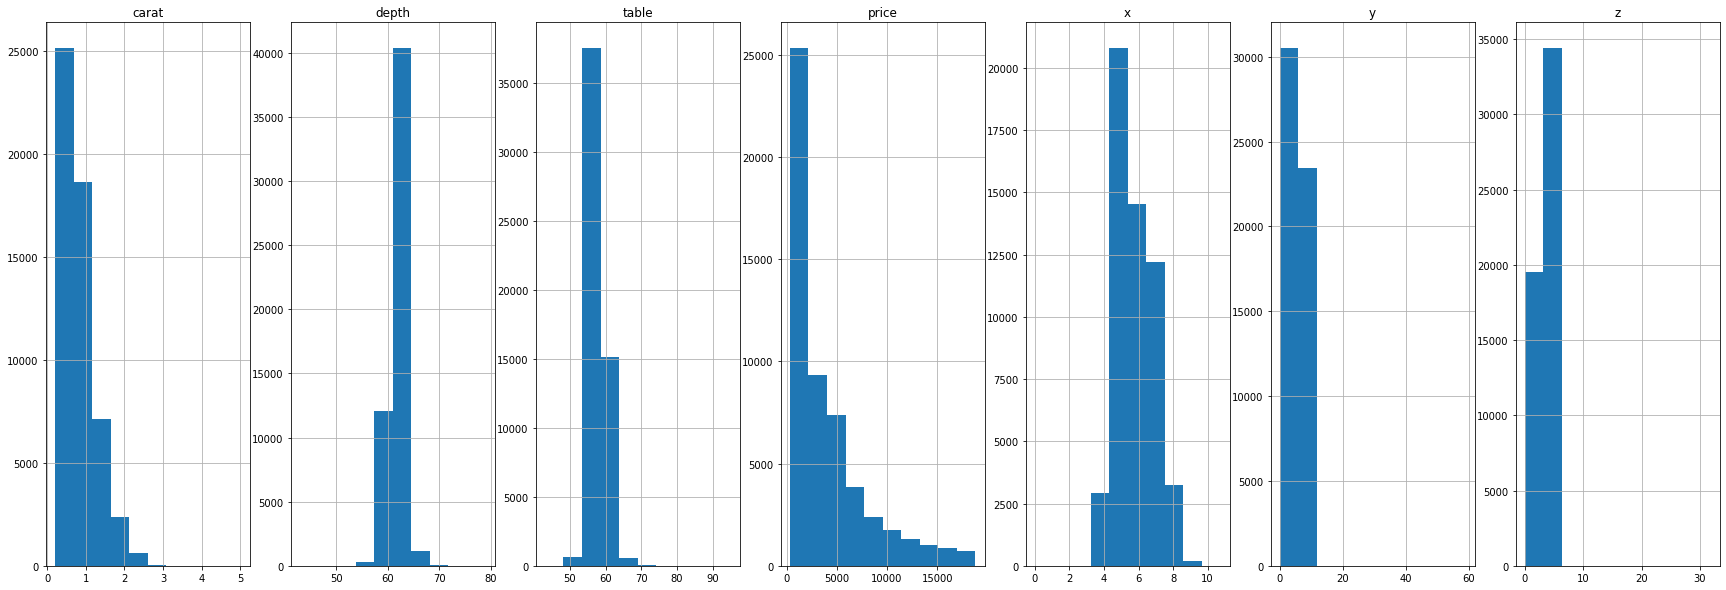

In [ ]:
fig, ax = plt.subplots(1, len(continuousFeatures))
fig.set_size_inches(30, 10)
for i in range(len(continuousFeatures)):
  cf = continuousFeatures[i]
  df[cf].hist(bins = 10, ax = ax[i])
  ax[i].title.set_text(cf)




"\n# clamp transformation for outliers in y\nQ1 = df['y'].quantile(0.25)\nQ3 = df['y'].quantile(0.75)\nIQR = Q3 - Q1    #IQR is interquartile range. \n\nupperFilter = (df['y'] >= Q3 + 1.5 *IQR)\nlowerFilter = (df['y'] <= Q1 - 1.5 *IQR)\ndf.loc[upperFilter,['y']]  = Q3 + 1.5 *IQR\ndf.loc[lowerFilter,['y']]  = Q1 - 1.5 *IQR\n"

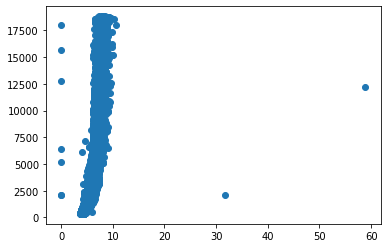

In [ ]:
plt.scatter(df['y'], df['price'])
# analyze outliers - are they incorrect input or rare examples?
IS = df['y'] > 20 
dfFiltered = df[IS]
dfFiltered.head()
"""
# clamp transformation for outliers in y
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

upperFilter = (df['y'] >= Q3 + 1.5 *IQR)
lowerFilter = (df['y'] <= Q1 - 1.5 *IQR)
df.loc[upperFilter,['y']]  = Q3 + 1.5 *IQR
df.loc[lowerFilter,['y']]  = Q1 - 1.5 *IQR
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b45f6e0d0>,
      dtype=object)

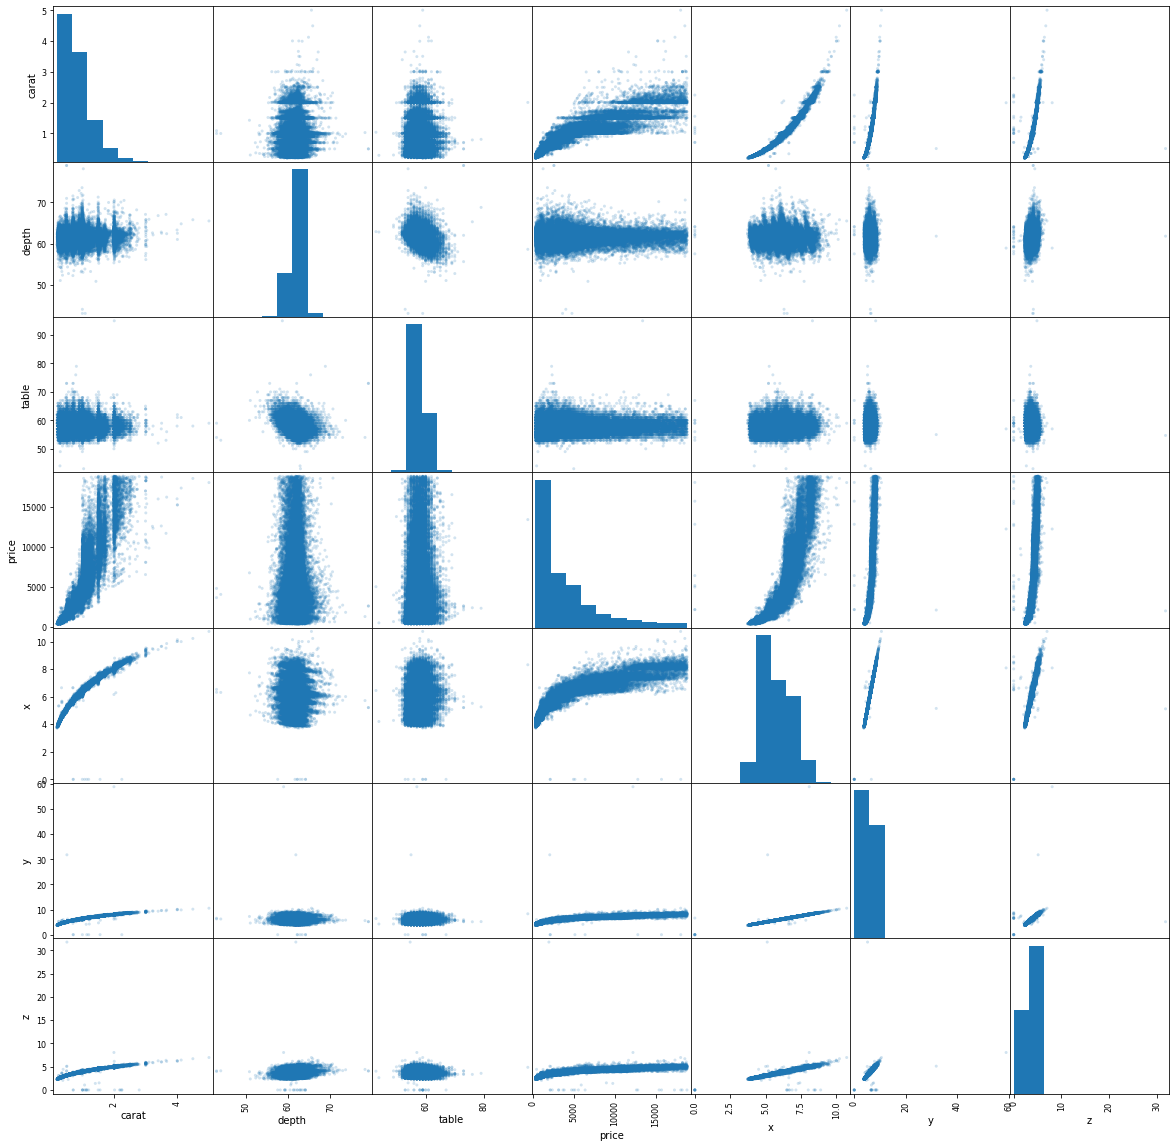

In [ ]:
pd.plotting.scatter_matrix(df[continuousFeatures], alpha = 0.2, figsize = (20, 20))

             carat      depth        table         price            x  \
carat     0.224687   0.019167     0.192365  1.742765e+03     0.518484   
depth     0.019167   2.052404    -0.946840 -6.085371e+01    -0.040641   
table     0.192365  -0.946840     4.992948  1.133318e+03     0.489643   
price  1742.765364 -60.853712  1133.318064  1.591563e+07  3958.021491   
x         0.518484  -0.040641     0.489643  3.958021e+03     1.258347   
y         0.515248  -0.048009     0.468972  3.943271e+03     1.248789   
z         0.318917   0.095968     0.237996  2.424713e+03     0.768487   

                 y            z  
carat     0.515248     0.318917  
depth    -0.048009     0.095968  
table     0.468972     0.237996  
price  3943.270810  2424.712613  
x         1.248789     0.768487  
y         1.304472     0.767320  
z         0.767320     0.498011  


Text(0.5, 1.0, "Spearman's correlation")

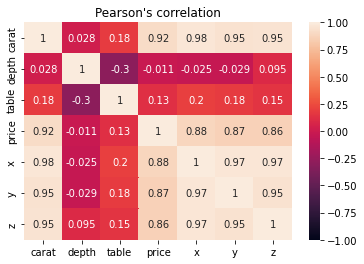

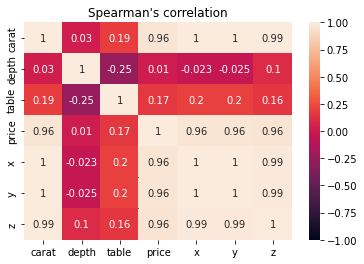

In [ ]:
covariance = df[continuousFeatures].cov()
print(covariance)
import seaborn as sns
# for continuous variables with "close to normal" distribution, use Pearson's correlation
correlation = df[continuousFeatures].corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title("Pearson's correlation")
# fot continuous variables with non-Gaussian distribution, use Spearman's correlation
plt.figure()
correlationSp = df[continuousFeatures].corr(method = 'spearman')
sns.heatmap(correlationSp, vmin=-1, vmax=1,  annot=True)
plt.title("Spearman's correlation")

value counts
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
frequencies
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64
------------------------------------------
value counts
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
frequencies
G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64
------------------------------------------
value counts
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
frequencies
SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: clarity, dtype: float64
------------------------------------------


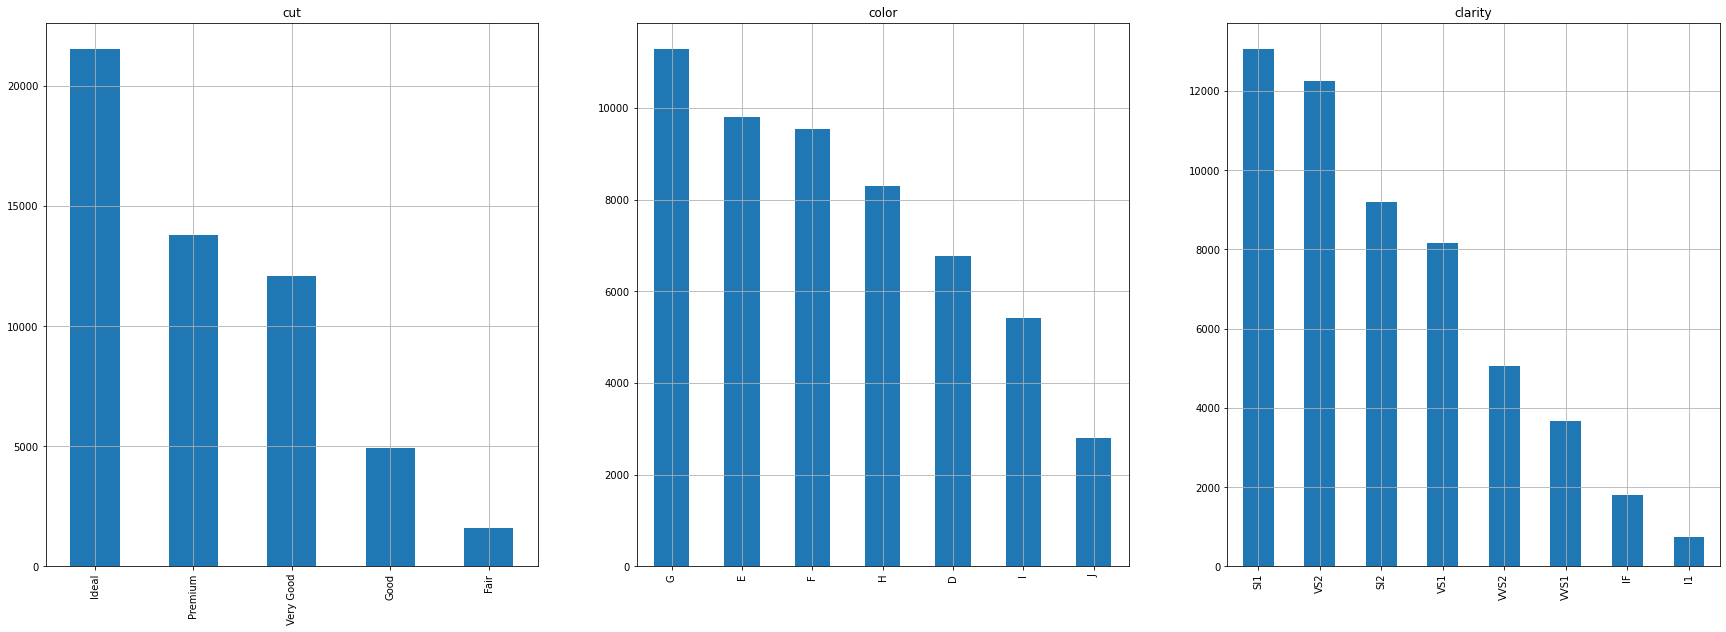

In [ ]:
# get value counts (use for 1st, 2nd, ... mode)

fig, ax = plt.subplots(1, len(categoricalFeatures))
fig.set_size_inches(30, 10)
for i in range(len(categoricalFeatures)):
  cf = categoricalFeatures[i]
  print("value counts")
  values = df[cf].value_counts()
  print(values)
  print("frequencies")
  frequencies = df[cf].value_counts()/df[cf].size
  print(frequencies)
  print("------------------------------------------")
  values.plot(kind = 'bar', ax = ax[i])
  ax[i].title.set_text(cf)
  ax[i].grid()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

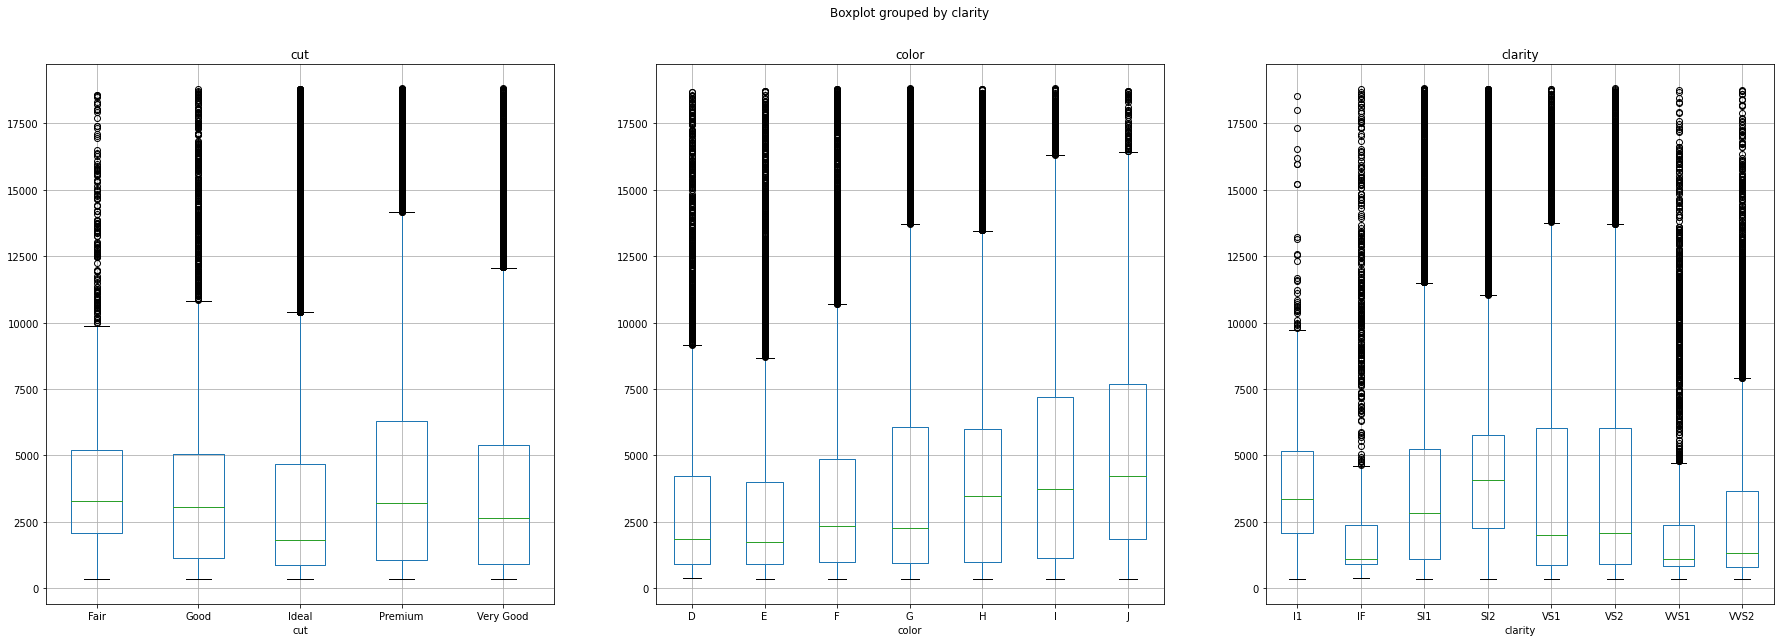

In [ ]:
fig, ax = plt.subplots(1, len(categoricalFeatures))
fig.set_size_inches(30, 10)
for i in range(len(categoricalFeatures)):
  cf = categoricalFeatures[i]
  df.boxplot(column = 'price', by = cf, ax = ax[i])
  ax[i].title.set_text(cf)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

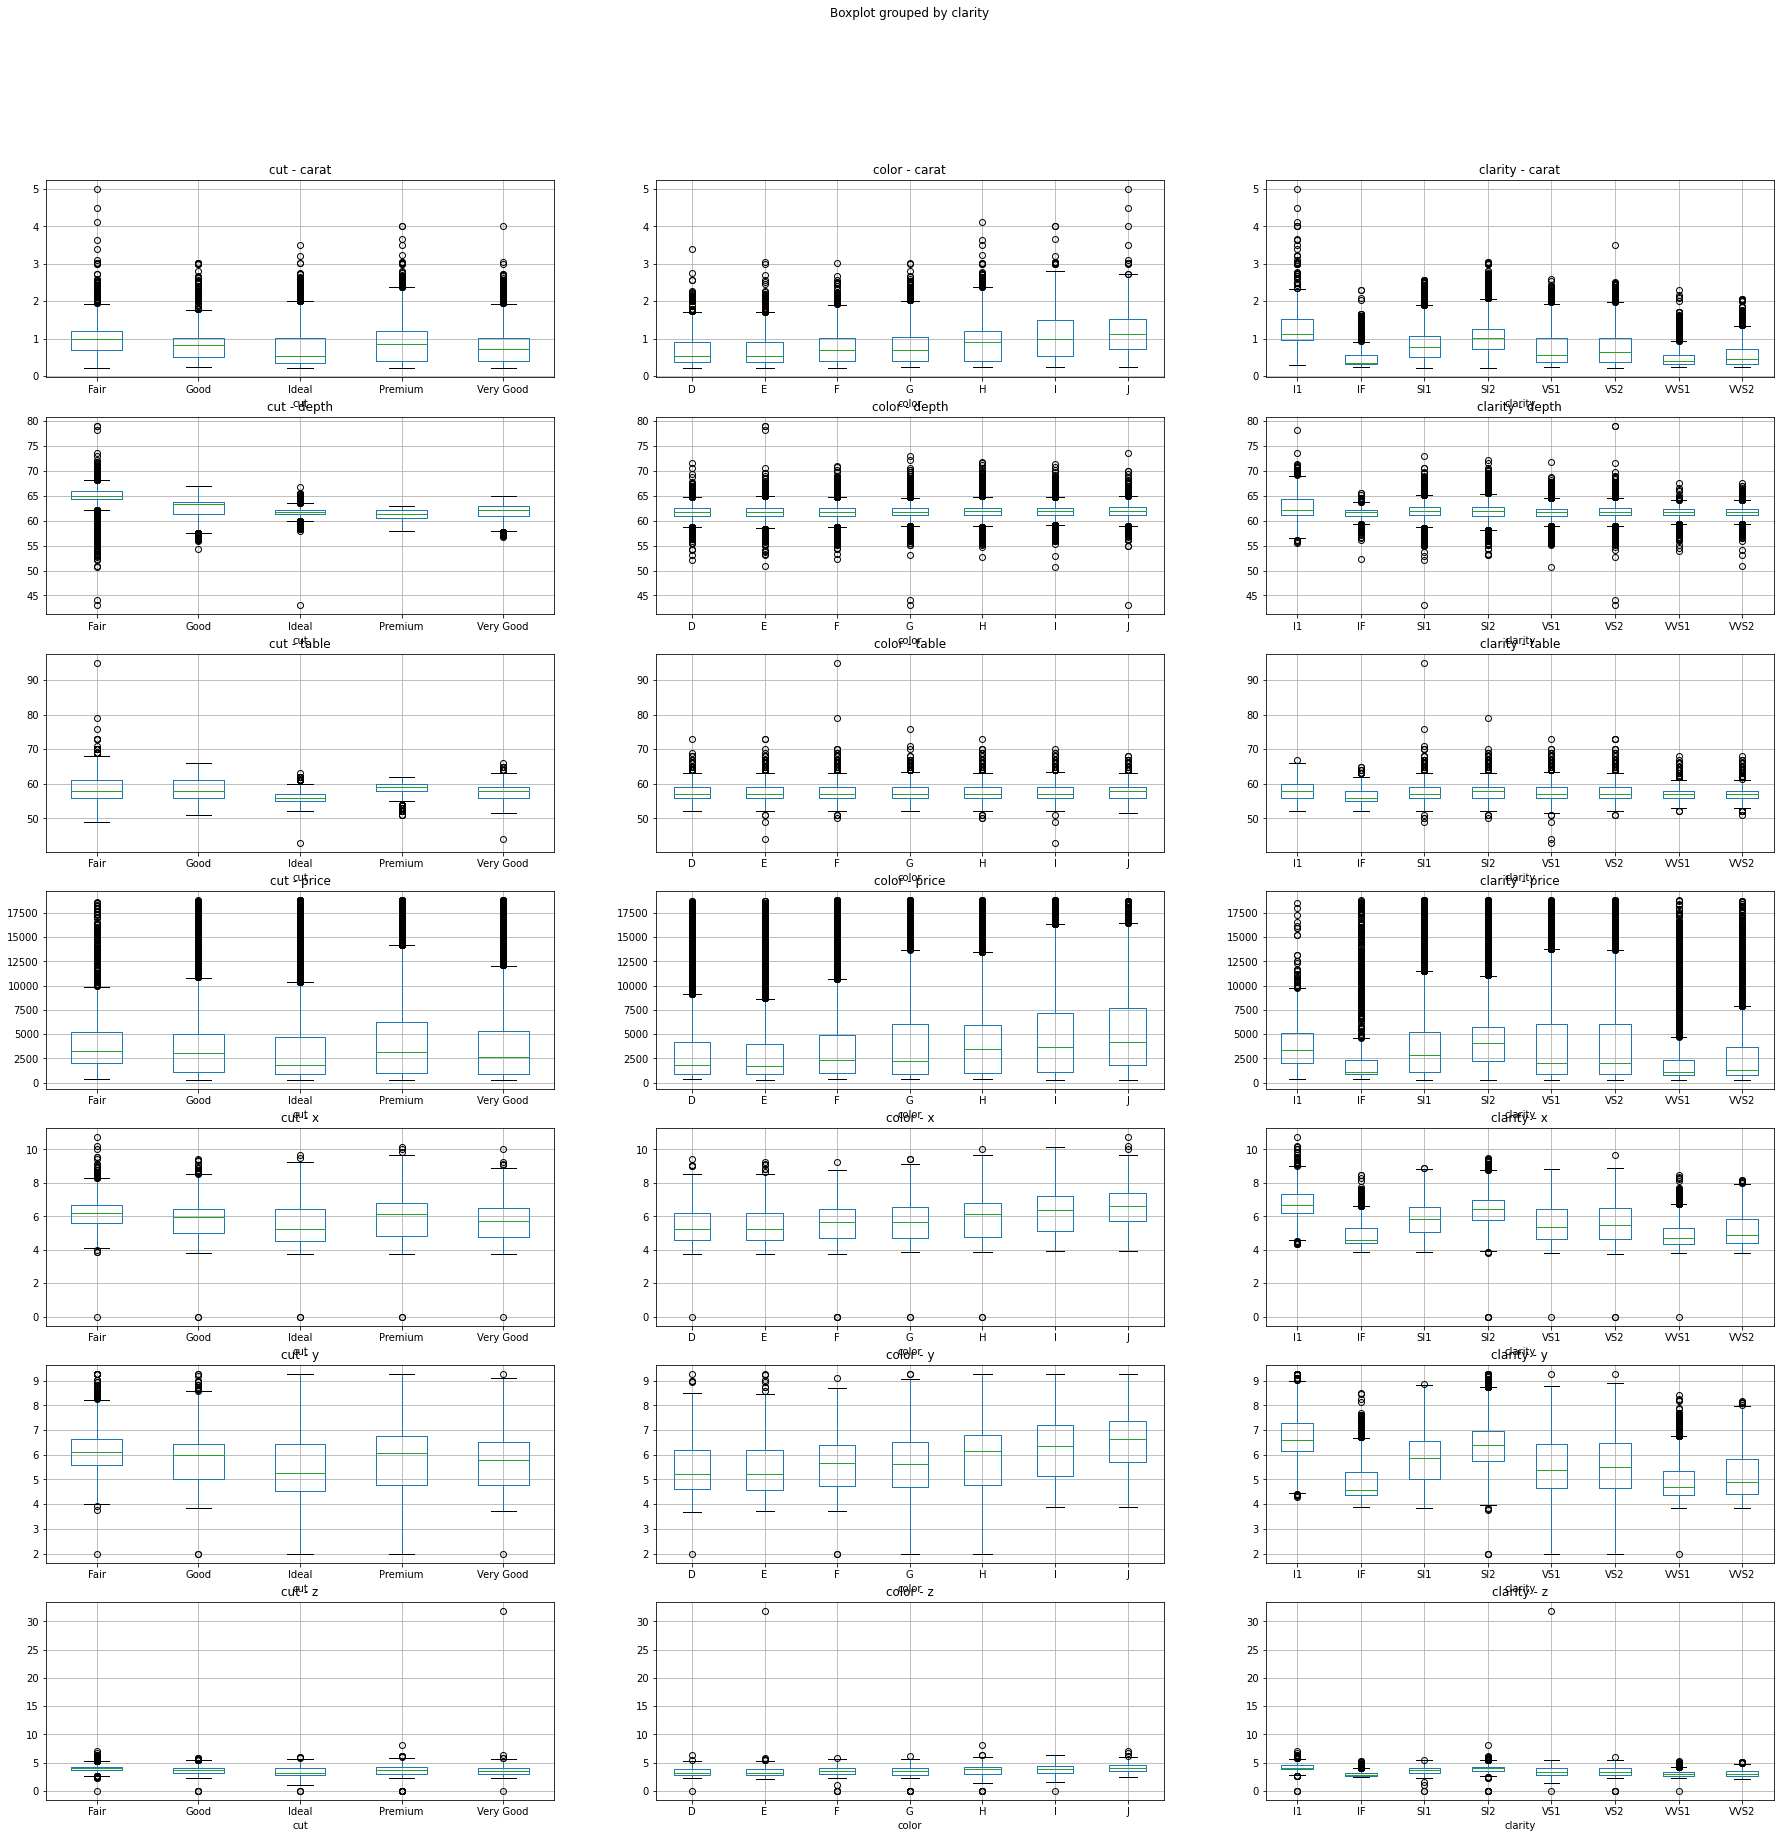

In [ ]:
# to analyze relationships between categorical and continuous features
fig, ax = plt.subplots(len(continuousFeatures), len(categoricalFeatures))
fig.set_size_inches(30, 30)
for i in range(len(categoricalFeatures)):
  cf = categoricalFeatures[i]
  for j in range(len(continuousFeatures)):
    df.boxplot(column = continuousFeatures[j], by = cf, ax = ax[j][i])
    ax[j][i].title.set_text(cf + " - " + continuousFeatures[j]) 